# Algorithmic Data Science : Lab 2

## Investigating the run-time of sorting algorithms




## Partial Solution

Lets first implement and test the insertion sort algorithm (see the lecture notes)

In [1]:
def insertion_sort(alist):
    for index in range(1,len(alist)):
        item=alist[index]
        sofar=index-1
        while sofar>-1 and alist[sofar]>item:
            alist[sofar+1]=alist[sofar]
            sofar-=1
        alist[sofar+1]=item
    return alist   

In [2]:
insertion_sort([5,6,2,8,11,3])

[2, 3, 5, 6, 8, 11]

Now we want to investigate the worst-case running time of this algorithm for different lengths of lists.

This means, for each value of n, we need to make a random list, sort it in reverse order (to make it the worst case) and then time sort it into correct order using insertion_sort.  This should be repeated at least 10 times to get a reasonably smooth graph.

First lets grab the makerandlist() and timeit() functions from lab 2 and test it still works

In [3]:
import random

def makerandlist(n,startno=1,endno=100):
    result=[]
    while n >0:
        result.append(random.randint(startno,endno))
        n-=1
    return result

makerandlist(10)

[11, 89, 61, 60, 40, 53, 6, 12, 83, 45]

In [4]:
import numpy as np
import time

def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
  
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

Now lets set up the iteration over the different values of n. We'll obtain the worst-case scenario by running the Python in-built *sorted* function to put the list in perfect *descending* order before running insertion-sort.

In [5]:
xs=[]
ys=[]

for n in range(10,1000,10):
    xs.append(n)
    alist=sorted(makerandlist(n),reverse=True)  
    (mean,stdev)=timeit(insertion_sort,alist,repeats=20)
    ys.append(mean)
    

Now lets plot the results

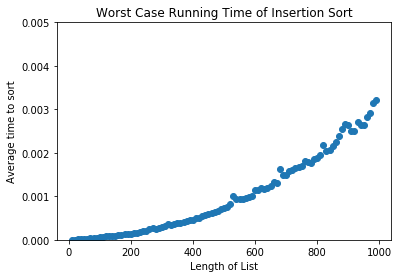

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xs,ys)
plt.ylim(0,0.005)
plt.xlabel("Length of List")
plt.ylabel("Average time to sort")
plt.title("Worst Case Running Time of Insertion Sort")
plt.show()

Is this quadratic?  We need some Maths
If $y=c_a.x^\alpha$ then it follows that:
$$\log(y) = \log(c_a) + \alpha \log(x)$$
so if we plot a graph of $\log(y)$ against $\log(x)$ the gradient will be $\alpha$ and the y intercept will be $\log(c_a)$

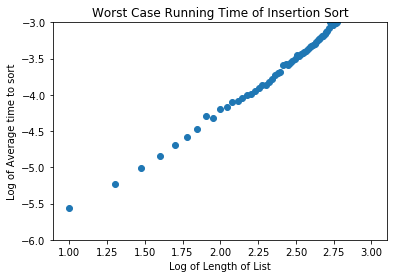

In [7]:
logxs=[np.log10(x) for x in xs]
logys=[np.log10(y) for y in ys]

plt.scatter(logxs,logys)
plt.ylim(-6,-3)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to sort")
plt.title("Worst Case Running Time of Insertion Sort")
plt.show()

Inspecting the graph we can see that this is fairly straight and the gradient is approximately 1.5 to 2.  The y intercept is about -6 so $c_a \approx 10^{-6} = 0.000001$.

To get more accurate values we can use the linear regression functions in scipy

In [8]:
import scipy.stats as stats

res = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.639099234543643 and intercept is -7.516372535112314


This shows that, empirically we have $O(n^{1.6})$ which is slightly better than $O(n^2)$.  Why?   In the algorithm there are some instructions which are only carried out O(n) times (outside the inner loop).  This will make the power appear lower than it really is unless n is asymptotically large.

Let's do some bigger values of $n$

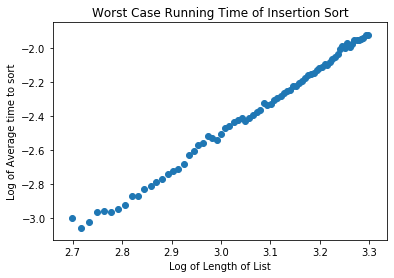

Slope is 1.9757184198693132 and intercept is -8.43461938783946


In [9]:
xs=[]
ys=[]

for n in range(500,2000,20):
    xs.append(n)
    alist=sorted(makerandlist(n),reverse=True)
    (mean,stdev)=timeit(insertion_sort,alist,repeats=20)
    ys.append(mean)
    
logxs=[np.log10(x) for x in xs]
logys=[np.log10(y) for y in ys]

plt.scatter(logxs,logys)
#plt.ylim(-6,0)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to sort")
plt.title("Worst Case Running Time of Insertion Sort")
plt.show()

res = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

We can see that the slope now is much closer to 2.  The constant is $10^{-9}$

As a sanity check, we can also look at the best case and the average case

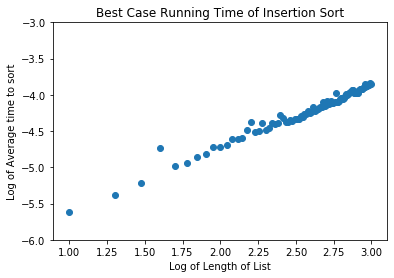

Slope is 0.8427084932794812 and intercept is -6.39545187492044


In [10]:
xs=[]
ys=[]

for n in range(10,1000,10):
    xs.append(n)
    alist=sorted(makerandlist(n),reverse=False)
    (mean,stdev)=timeit(insertion_sort,alist,repeats=20)
    ys.append(mean)
    
logxs=[np.log10(x) for x in xs]
logys=[np.log10(y) for y in ys]

plt.scatter(logxs,logys)
plt.ylim(-6,-3)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to sort")
plt.title("Best Case Running Time of Insertion Sort")
plt.show()

res = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

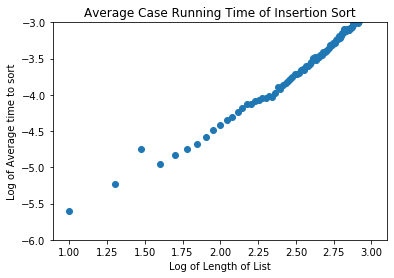

Slope is 1.497412231466697 and intercept is -7.382873889488357


In [11]:
xs=[]
ys=[]

for n in range(10,1000,10):
    xs.append(n)
    alist=makerandlist(n)
    (mean,stdev)=timeit(insertion_sort,alist,repeats=20)
    ys.append(mean)
    
logxs=[np.log10(x) for x in xs]
logys=[np.log10(y) for y in ys]

plt.scatter(logxs,logys)
plt.ylim(-6,-3)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to sort")
plt.title("Average Case Running Time of Insertion Sort")
plt.show()

res = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Now for some somewhat subtle statistics! 

Note that linregress also returns rvalue, pvalue, stderr, and intercept_stderr.  rvalue is (Pearson's product-moment) correlation coefficient.  pvalue is the probability of having a correlation coefficient so big given that the actual slope is zero, and stderr is the standard error of the estimated gradient, and intercept_stderr is the standard error of the estimated intercept. The standard error of the estimated gradient tells you roughly how much this estimate would be expected to vary if you ran the whole experiment a bunch of times- it is the expected standard deviation of the estimate of the gradient, across experiments. 

stderr and intercept_stderr have been computed using statistical formulae which relate these to the number of data points, the correlation coefficient $r$, the variance in x-coordinates and the variance in y-coordinates.

In order to get more accurate values for the slope and intercept we need to get lower values of stderr and intercept_stderr.  In general, we would do this by repeating the function more times for each value of n (so the line should be smoother) and repeating for more and larger values of n (when the relationship should be truest).



In [12]:
print(res.pvalue,res.stderr,res.intercept_stderr)

7.146065079619693e-84 0.021900752869595533 0.05708334465542067


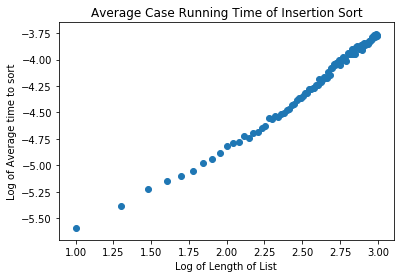

Slope is 1.023343323952524, intercept is -6.858052905429929 and intercept error is 0.03337779557997482


In [13]:
xs=[]
ys=[]

for n in range(10,1000,10):
    xs.append(n)
    alist=makerandlist(n)
    (mean,stdev)=timeit(insertion_sort,alist,repeats=1000)
    ys.append(mean)
    
logxs=[np.log10(x) for x in xs]
logys=[np.log10(y) for y in ys]

plt.scatter(logxs,logys)
plt.xlabel("Log of Length of List")
plt.ylabel("Log of Average time to sort")
plt.title("Average Case Running Time of Insertion Sort")
plt.show()

res = stats.linregress(logxs, logys)
print("Slope is {}, intercept is {} and intercept error is {}".format(res.slope,res.intercept,res.intercept_stderr))